<a href="https://colab.research.google.com/github/Amatt2-B/LauCows/blob/main/DayCowDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAETEC Cow Detection Training
This notebook has the training process for a cow bounding box recognition model
using YOLOv8

<a target="_blank" href="https://colab.research.google.com/github/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20Colab-F9AB00?style=for-the-badge&logo=google-colab&color=525252" alt="Open in Colab"/>
</a>

<a target="_blank" href="https://github.com/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20GitHub-000?style=for-the-badge&logo=github&logoColor=white" alt="Open in GitHub"/>
</a>

<a target="_blank" href="https://www.kaggle.com/kernels/welcome?src=https://github.com/Amatt2-B/LauCows/blob/main/notebooks/CowDetection.ipynb">
  <img src="https://img.shields.io/badge/Open%20in%20Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white" alt="Open in Kaggle"/>
</a>

In [2]:
!pip install ultralytics


In [3]:
!pip install python-dotenv


In [4]:
from ultralytics import YOLO
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import shutil
import os
import pathlib
import torch
import cv2

### Running on a local environment
**IMPORTANT!!!**

To load the path on a local environment the notebook uses a .env file
if you don't have it already, create it on the notebooks/ directory and fill the
variables from .template.env


In [5]:
from dotenv import load_dotenv
load_dotenv();
DATASET_DIR = pathlib.Path(os.getenv('COW_DETECT_PWD'))

TypeError: expected str, bytes or os.PathLike object, not NoneType

### Running on colab

Mount your drive and add the path to the dataset directory on the `DATASET_DIR` variable


In [ ]:

from pathlib import Path

# Cambia DATASET_DIR a un objeto Path
DATASET_DIR = Path('G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay')


### Running on kaggle
**TODO**: figure if it is posible

### Dataset preparation

The following code will separate the dataset into a training an validation sub-sets
this assumes that your folder structure is

```
dataset/
├── images/
│   ├── image1.jpg
│   ├── image2.jpg
│   └── ...
└── labels/
    ├── image1.txt
    ├── image2.txt
    └── ...

```

This section separates the dataset in this structure

```
dataset/
├── train/
│   ├── images/
│   │   ├── image1.jpg
│   │   ├── image2.jpg
│   │   └── ...
│   └── labels/
│       ├── image1.txt
│       ├── image2.txt
│       └── ...
└── val/
    ├── images/
    │   ├── image3.jpg
    │   ├── image4.jpg
    │   └── ...
    └── labels/
        ├── image3.txt
        ├── image4.txt
        └── ...
```


**Important**
Only do this step if your data is not separated already

In [ ]:
# Load images and labels file names
images = os.listdir(DATASET_DIR.joinpath('images'))
labels = os.listdir(DATASET_DIR.joinpath('labels'))

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'G:\\Shared drives\\CNN_COW_CAETEC\\DATASET\\YoloCowsNight\\images'

#### Separation

In [ ]:
# 80% training 60% validation
trainImages, valImages, trainLabels, valLabels = train_test_split(
    images, labels,
    test_size=0.2, random_state=69, shuffle=True
)

In [ ]:
def ClearDir(path):
    if os.path.isdir(path):
        os.rmdir(path)

def CopyImages(imgs, labls, to='train'):
    ClearDir(DATASET_DIR.joinpath(to))

    os.mkdir(DATASET_DIR.joinpath(to))
    os.mkdir(DATASET_DIR.joinpath(to,'images'))
    os.mkdir(DATASET_DIR.joinpath(to,'labels'))

    PATH_TO = DATASET_DIR.joinpath(to)

    print(f'Moving to {to}')

    for idx, image in enumerate(imgs):
        shutil.copy(
            DATASET_DIR.joinpath('images', image),
            PATH_TO.joinpath('images', image)
        )

        shutil.copy(
            DATASET_DIR.joinpath('labels', labls[idx]),
            PATH_TO.joinpath('labels', labls[idx])
        )


In [ ]:
CopyImages(trainImages, trainLabels, to='train')
CopyImages(valImages, valLabels, to='valid')

Moving to train
Moving to valid


#### Model Training

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [22]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [23]:
model = YOLO(r"G:\My Drive\7ptimo Sem\best.pt")
model.to(device);

In [24]:
import os

val_images_path = "G:\\Shared drives\\CNN_COW_CAETEC\\DATASET\\YoloCowsDay\\valid\\images"
images = os.listdir(val_images_path)
print("Imágenes encontradas:", images)


Imágenes encontradas: ['2024-04-13-06-15-03.jpg', '2024-04-12-16-05-03.jpg', '2024-04-14-11-10-03.jpg', '2024-04-15-09-30-03.jpg', '2024-04-14-14-00-03.jpg', '2024-04-13-10-35-03.jpg', '2024-04-13-09-45-03.jpg', '2024-04-13-07-00-03.jpg', '2024-04-12-14-55-03.jpg', '2024-04-12-13-20-03.jpg', '2024-04-12-12-00-03.jpg', '2024-04-12-13-35-04.jpg', '2024-04-22-14-55-04.jpg', '2024-04-13-18-55-03.jpg', '2024-04-13-18-20-03.jpg', '2024-04-14-06-20-03.jpg', '2024-04-13-18-35-03.jpg', '2024-04-13-19-10-03.jpg', '2024-04-13-18-50-03.jpg', '2024-04-14-06-30-03.jpg', '2024-04-12-18-45-03.jpg', '2024-04-12-17-00-03.jpg', '2024-04-22-15-25-03.jpg', '2024-04-22-16-55-03.jpg', '2024-04-22-17-30-03.jpg', '2024-04-22-15-35-04.jpg', '2024-04-22-15-05-03.jpg', '2024-04-22-18-05-03.jpg', '2024-04-14-18-20-03.jpg', '2024-04-14-17-35-03.jpg', '2024-04-14-18-45-03.jpg', '2024-04-14-19-00-03.jpg', '2024-04-14-18-25-03.jpg', '2024-04-14-19-10-03.jpg', '2024-04-15-05-50-03.jpg', '2024-04-15-13-20-04.jpg', '2024

In [25]:
%env CUDA_LAUNCH_BLOCKING=1


env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
model.train(data=DATASET_DIR.joinpath('data.yaml'))

New https://pypi.org/project/ultralytics/8.3.28 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=G:\My Drive\7ptimo Sem\best.pt, data=G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay\data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

train: Scanning G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay\train\labels... 3744 images, 155 backgrounds, 0 cor


train: New cache created: G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay\valid\labels... 937 images, 36 backgrounds, 0 corrupt


val: New cache created: G:\Shared drives\CNN_COW_CAETEC\DATASET\YoloCowsDay\valid\labels.cache
Plotting labels to runs\detect\train11\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train11
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.16G      0.607     0.4024      1.039        111        640: 100%|██████████| 234/234 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11

                   all        937       4297      0.964      0.971       0.99      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.22G      0.621     0.4143      1.037        156        640: 100%|██████████| 234/234 [01:22<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.965      0.959      0.983      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.13G      0.643     0.4369       1.05        140        640: 100%|██████████| 234/234 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.964      0.963      0.989      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.2G     0.6458     0.4417      1.051        158        640: 100%|██████████| 234/234 [01:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.965      0.959      0.988      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.14G     0.6496     0.4463      1.052        126        640: 100%|██████████| 234/234 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.961      0.962      0.988      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.23G     0.6502     0.4439      1.054        131        640: 100%|██████████| 234/234 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.961      0.966      0.989      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       2.2G     0.6382     0.4403      1.049        128        640: 100%|██████████| 234/234 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.959      0.965      0.987      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.21G       0.64     0.4386      1.052        183        640: 100%|██████████| 234/234 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.952      0.969      0.986      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.13G     0.6422     0.4383      1.049        131        640: 100%|██████████| 234/234 [01:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10


                   all        937       4297      0.952      0.968      0.987      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.15G     0.6376     0.4327      1.044        185        640: 100%|██████████| 234/234 [01:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.959      0.966      0.987      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.14G     0.6443     0.4374       1.05        166        640: 100%|██████████| 234/234 [01:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18

                   all        937       4297      0.953      0.964      0.987      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.23G     0.6374      0.435      1.047        125        640: 100%|██████████| 234/234 [02:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16

                   all        937       4297      0.961      0.964      0.988      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.15G     0.6274     0.4342      1.039        164        640: 100%|██████████| 234/234 [02:24<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:17

                   all        937       4297      0.964      0.962      0.988      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.22G     0.6278     0.4271       1.04        213        640: 100%|██████████| 234/234 [02:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:18

                   all        937       4297      0.962      0.963      0.988      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.13G     0.6316     0.4283      1.046        149        640: 100%|██████████| 234/234 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16

                   all        937       4297      0.958      0.963      0.987      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.25G     0.6265     0.4255       1.04        133        640: 100%|██████████| 234/234 [02:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:17

                   all        937       4297      0.961      0.966      0.988       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.21G     0.6279      0.421      1.041        169        640: 100%|██████████| 234/234 [02:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:17

                   all        937       4297      0.964      0.966      0.988      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.24G     0.6269     0.4273      1.044        146        640: 100%|██████████| 234/234 [02:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:16

                   all        937       4297      0.963      0.967      0.986      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.16G     0.6213     0.4253      1.039        143        640: 100%|██████████| 234/234 [02:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12


                   all        937       4297      0.965      0.959      0.988      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       2.2G     0.6237     0.4173      1.045        138        640: 100%|██████████| 234/234 [02:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:12


                   all        937       4297      0.966      0.958      0.988      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.21G     0.6223     0.4214      1.043        158        640: 100%|██████████| 234/234 [01:50<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.962      0.967      0.989      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.24G     0.6137     0.4194      1.035        167        640: 100%|██████████| 234/234 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11

                   all        937       4297      0.958      0.968      0.988       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.2G     0.6131     0.4172      1.032        132        640: 100%|██████████| 234/234 [01:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.961      0.964      0.987      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       2.2G     0.6157     0.4143      1.036        181        640: 100%|██████████| 234/234 [01:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.967      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.13G     0.6125     0.4142      1.033        167        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.969      0.986      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.23G     0.6095     0.4115      1.033        179        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10


                   all        937       4297      0.959       0.97      0.988      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.2G     0.6001     0.4047      1.028        155        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.956      0.968      0.987      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.21G     0.6016     0.4073      1.029        197        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09


                   all        937       4297      0.967      0.957      0.988      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       2.2G     0.6056     0.4088      1.032        157        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.964      0.958      0.988      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.21G     0.6091     0.4094      1.031        141        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09


                   all        937       4297      0.965       0.96      0.989      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.16G     0.5971      0.404      1.026        158        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.958      0.969      0.989      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.17G     0.5978     0.4026      1.027        140        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297       0.97      0.952      0.988      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.16G     0.5938     0.4032      1.025        170        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.958      0.963      0.988      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       2.2G     0.5892     0.3986      1.023        180        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.957      0.967      0.989      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       2.2G     0.5914     0.4001      1.023        157        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.964      0.987      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.23G     0.5889     0.3973       1.02        135        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09


                   all        937       4297      0.959      0.967      0.988      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.21G     0.5843     0.3942      1.019        140        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.963      0.963      0.988      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.13G      0.584     0.3941      1.017        181        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297       0.96      0.967       0.99      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.14G     0.5891     0.3943      1.023        195        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.965      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.15G      0.581     0.3908      1.018        154        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.968      0.959      0.989      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.23G      0.589     0.3988      1.024        141        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.968      0.987      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.14G     0.5814     0.3914      1.018        181        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.956      0.967      0.989      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.16G      0.572     0.3893      1.016        159        640: 100%|██████████| 234/234 [01:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.965      0.959      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.21G     0.5808      0.387      1.014        130        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.964      0.965      0.988      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.21G     0.5755     0.3899      1.019        130        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.961      0.966      0.989      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.16G     0.5762     0.3842      1.015        141        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.968      0.989      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.21G     0.5742     0.3835      1.011        142        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297       0.96      0.965      0.987      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.16G      0.567     0.3823      1.014        157        640: 100%|██████████| 234/234 [01:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.966      0.988      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.13G     0.5651     0.3749      1.007        155        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.966      0.987      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.22G     0.5758       0.38      1.014        126        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.961      0.988      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.23G     0.5681     0.3764      1.009        124        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.966      0.988      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.21G      0.559     0.3717      1.004        163        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.965      0.988      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.14G     0.5617     0.3729      1.006        159        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.967      0.988      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.22G     0.5609     0.3759      1.007        168        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.968      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100       2.2G     0.5609     0.3706      1.004        147        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.954       0.97      0.987      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.21G     0.5649     0.3766       1.01        153        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.963      0.989      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.21G     0.5544     0.3689      1.002        165        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.965      0.989      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.21G     0.5547     0.3692      1.005        152        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.961      0.964      0.988      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.17G     0.5532     0.3664      1.004        159        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.966      0.988      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.14G     0.5471     0.3646      1.004        138        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.965      0.989      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.21G     0.5525     0.3663          1        204        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.968      0.988      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.14G     0.5409     0.3644     0.9977        173        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.967      0.988      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.22G     0.5446     0.3575     0.9987        130        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.961      0.965      0.988      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.21G     0.5447     0.3644      1.001        143        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.965      0.989      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.21G     0.5405     0.3574     0.9943        183        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.968      0.989      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.22G     0.5435     0.3583     0.9964        150        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.963      0.988      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.23G     0.5371     0.3588      0.995        166        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.964      0.964      0.989      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.13G     0.5362     0.3581      0.998        153        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.967      0.957      0.988      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.14G      0.538     0.3558     0.9949        167        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.967      0.987      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.23G     0.5439     0.3588      1.003        157        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.967      0.988      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.15G     0.5308     0.3531     0.9965        154        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.965      0.987      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.17G     0.5267       0.35     0.9911        164        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.966      0.988      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.16G     0.5336     0.3539     0.9927        146        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.955      0.971      0.988      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.14G     0.5323     0.3518     0.9938        170        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.967      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.22G     0.5297     0.3513     0.9919        171        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.955      0.972      0.988      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.22G      0.529     0.3484     0.9882        146        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.971      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       2.2G     0.5245     0.3444     0.9874        188        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.967      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.22G     0.5193     0.3441     0.9842        176        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.967      0.988      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.23G     0.5281     0.3457     0.9893        147        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.962      0.969      0.987       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.22G     0.5175     0.3401     0.9852        179        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963      0.966      0.988      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.22G     0.5244     0.3441     0.9912        174        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.967      0.988      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.15G     0.5234     0.3445     0.9887        120        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.971      0.988      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.14G     0.5218      0.342     0.9864        164        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.968      0.988      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.14G     0.5129     0.3373     0.9805        153        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.969      0.988      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.16G     0.5177     0.3404     0.9851        132        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:10

                   all        937       4297      0.959      0.972      0.989      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.13G     0.5179     0.3386     0.9862        126        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.961      0.971      0.988      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.15G     0.5123     0.3385     0.9848        221        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959       0.97      0.988      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.16G     0.5094     0.3378     0.9831        127        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96       0.97      0.988      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.23G     0.5064     0.3349     0.9789        171        640: 100%|██████████| 234/234 [01:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09


                   all        937       4297      0.959      0.971      0.988      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.14G     0.5068     0.3343     0.9786        163        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.957      0.972      0.988      0.874


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.11G     0.4809     0.2921       0.96         70        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.953      0.971      0.987      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.1G     0.4664     0.2818     0.9526         71        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.954      0.969      0.987      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.11G     0.4613     0.2772     0.9506         85        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.966      0.988       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.11G     0.4656     0.2796      0.949         70        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.959      0.966      0.987      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.1G     0.4563     0.2753      0.946         55        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.967      0.988      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.11G     0.4491     0.2714     0.9437         77        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.958      0.964      0.987      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.11G      0.453     0.2699     0.9445         79        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.957      0.967      0.987      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.11G     0.4463     0.2696     0.9367         64        640: 100%|██████████| 234/234 [01:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09


                   all        937       4297      0.953      0.968      0.987      0.873

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.11G     0.4465     0.2674     0.9388         84        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297      0.963       0.96      0.987      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.11G     0.4447     0.2673     0.9389         74        640: 100%|██████████| 234/234 [01:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:09

                   all        937       4297       0.96      0.963      0.987      0.874



100 epochs completed in 2.422 hours.
Optimizer stripped from runs\detect\train11\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train11\weights\best.pt, 6.2MB

Validating runs\detect\train11\weights\best.pt...
Ultralytics 8.3.27  Python-3.11.9 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:11


                   all        937       4297      0.964      0.971       0.99      0.879
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train11


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021293C5FF10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

### Plotting training metrics

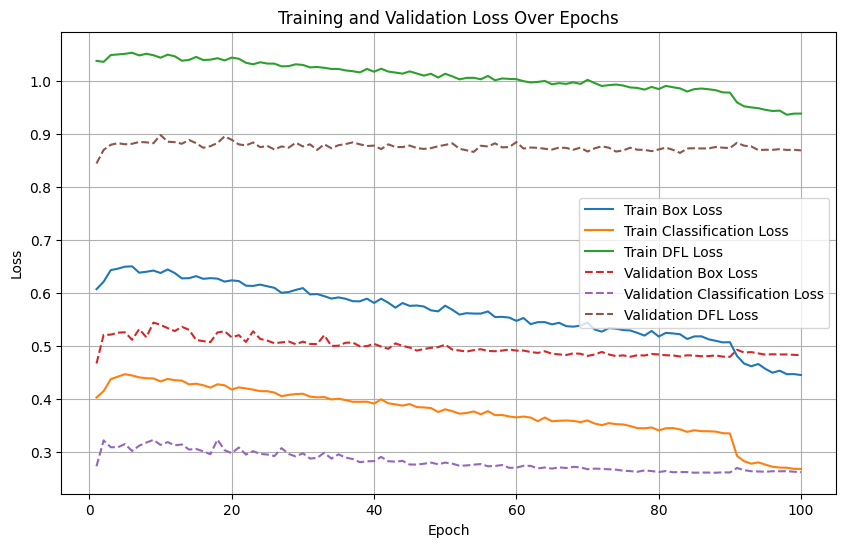

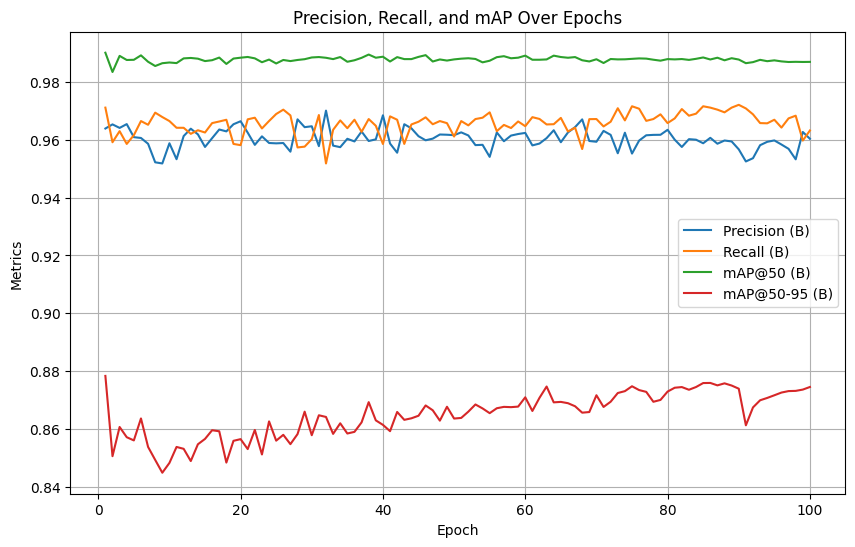

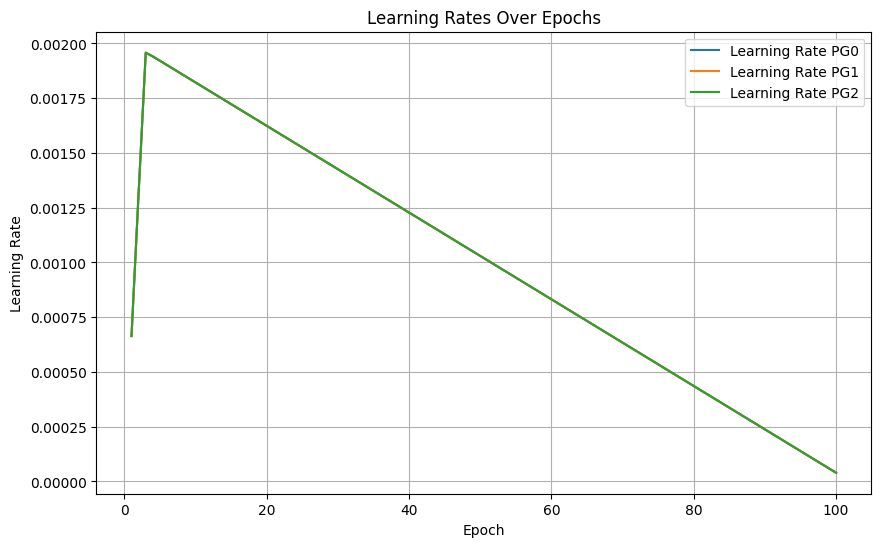

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

results = pd.read_csv(pathlib.Path('./runs/detect/train11/results.csv'))
results.columns = results.columns.str.strip()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Train Classification Loss')
plt.plot(results['epoch'], results['train/dfl_loss'], label='Train DFL Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss', linestyle='--')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Classification Loss', linestyle='--')
plt.plot(results['epoch'], results['val/dfl_loss'], label='Validation DFL Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['metrics/precision(B)'], label='Precision (B)')
plt.plot(results['epoch'], results['metrics/recall(B)'], label='Recall (B)')
plt.plot(results['epoch'], results['metrics/mAP50(B)'], label='mAP@50 (B)')
plt.plot(results['epoch'], results['metrics/mAP50-95(B)'], label='mAP@50-95 (B)')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Precision, Recall, and mAP Over Epochs')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['lr/pg0'], label='Learning Rate PG0')
plt.plot(results['epoch'], results['lr/pg1'], label='Learning Rate PG1')
plt.plot(results['epoch'], results['lr/pg2'], label='Learning Rate PG2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rates Over Epochs')
plt.legend()
plt.grid()
plt.show()

### Export the model

In [26]:
model.export()

Ultralytics 8.3.27  Python-3.11.9 torch-2.5.1+cu118 CPU (AMD Ryzen 5 7535HS with Radeon Graphics)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'G:\My Drive\7ptimo Sem\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TorchScript: starting export with torch 2.5.1+cu118...
TorchScript: export success  2.1s, saved as 'G:\My Drive\7ptimo Sem\best.torchscript' (11.9 MB)

Export complete (4.3s)
Results saved to G:\My Drive\7ptimo Sem
Predict:         yolo predict task=detect model=G:\My Drive\7ptimo Sem\best.torchscript imgsz=640  
Validate:        yolo val task=detect model=G:\My Drive\7ptimo Sem\best.torchscript imgsz=640 data=D:\Dev\Datasets\YoloCows\data.yaml  
Visualize:       https://netron.app


'G:\\My Drive\\7ptimo Sem\\best.torchscript'

### Plot predictions

In [29]:
image = cv2.imread(r"C:\Users\adria\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\7mo Sem\LauCows\LauCows\testimgs\img01.jpg")

In [30]:
preds = model.predict(image)


0: 384x640 6 cows, 113.1ms
Speed: 10.6ms preprocess, 113.1ms inference, 181.0ms postprocess per image at shape (1, 3, 384, 640)


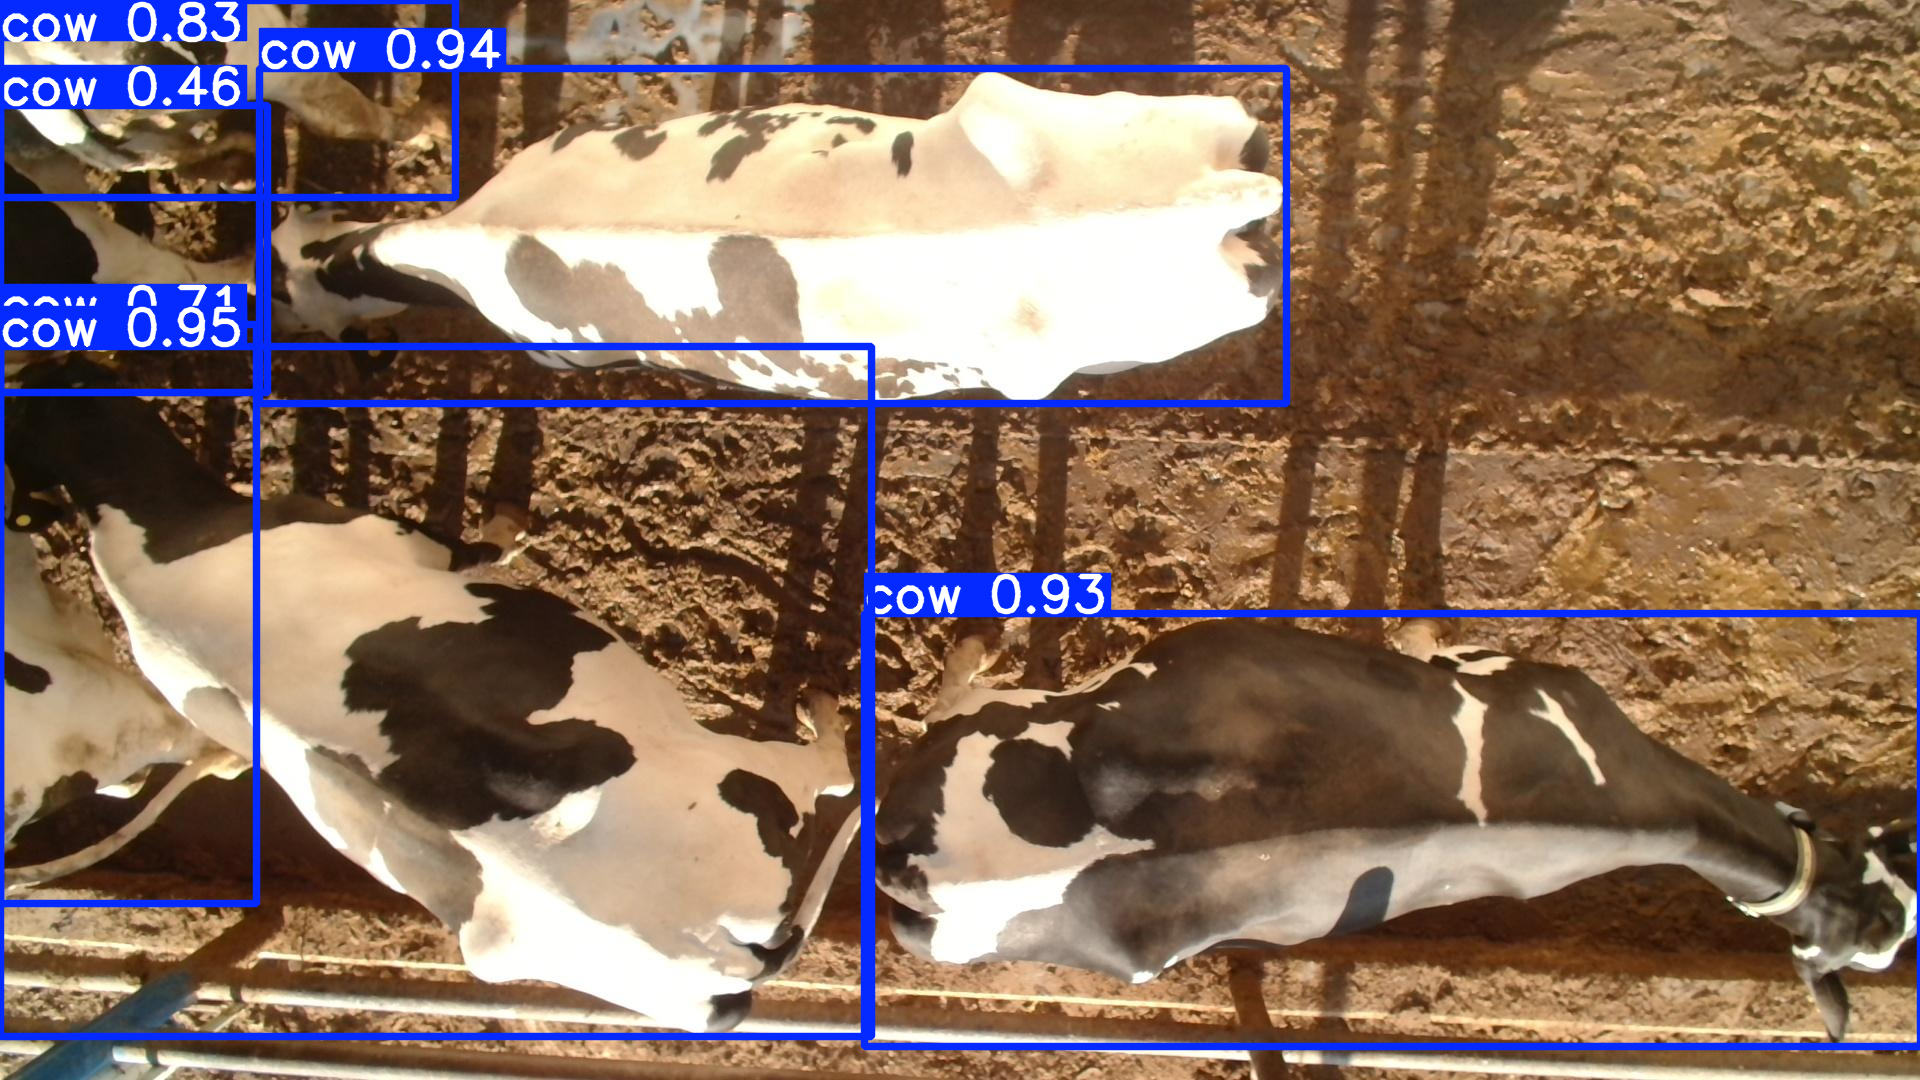

In [31]:
plot = preds[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))